# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation on regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [7]:
# import libraries
import torch
import torch.nn as nn
# DataLoader and train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from rich import print

# Create the data and the model

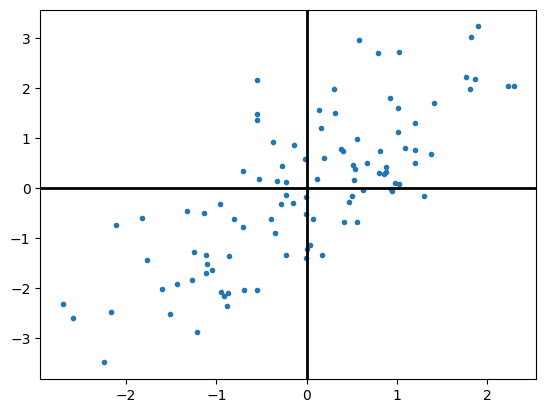

In [8]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'.')
# axes
plt.axhline(0, color='black', lw=2)
plt.axvline(0, color='black', lw=2)
plt.show()

In [9]:
x.std(  )

tensor(1.0879)

In [10]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [11]:
# model meta-parameters

learningRate = 0.05

# loss function
lossfun = nn.MSELoss()  # mean squared error

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

# Select data for training

In [12]:
def train_test(x, y, N, train=0.8, info=False):
    # select training data (note the hard-coded N!)
    trainidx = np.random.choice(range(N), int(100*train), replace=False)  # random indices
    trainBool = np.zeros(N, dtype=bool)  # initialize vector of Falses'
    trainBool[trainidx] = True  # set selected samples to True

    x_train = x[trainBool]  # select training data
    x_test = x[~trainBool]  # select test data
    y_train = y[trainBool]  # select training data
    y_test = y[~trainBool]  # select test data

    # show the sizes
    if info:
        print(x[trainBool].shape)
        print(x[~trainBool].shape)

    return x_train, x_test, y_train, y_test, trainBool

In [13]:
# test the function
x_train, x_test, y_train, y_test, trainBool = train_test(x, y, N, train=0.8, info=True)
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])


torch.Size([80, 1])

torch.Size([20, 1])

tensor([[-1.1415],
        [ 0.3803],
        [-0.0057],
        [ 2.2904],
        [-1.3299]])

tensor([[-0.5051],
        [ 0.7876],
        [-0.5267],
        [ 2.0347],
        [-0.4674]])

tensor([[ 0.8817],
        [ 1.1975],
        [ 0.4140],
        [ 0.9196],
        [-0.6999]])

tensor([[ 0.3169],
        [ 0.5053],
        [-0.6720],
        [ 1.7981],
        [-0.7743]])

# Train the model

In [14]:
x_train, x_test, y_train, y_test, trainBool = train_test(x, y, N, train=0.8, info=True)

numepochs = 1000
for epochi in range(numepochs):
    # forward pass
    yHat = ANNreg(x_train)

    # compute loss
    loss = lossfun(yHat, y_train)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.Size([80, 1])

torch.Size([20, 1])

In [15]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x_test)
testloss = (predYtest-y_test).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 0.88

Final TEST loss: 1.13

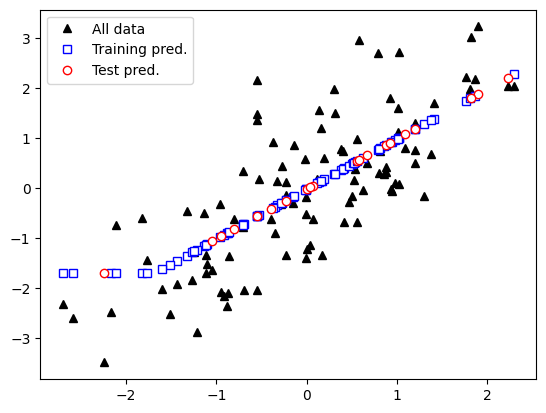

In [16]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x_train).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x_train, predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x_test,predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# Additional explorations

In [397]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
# 
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
# 
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss 
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
# 

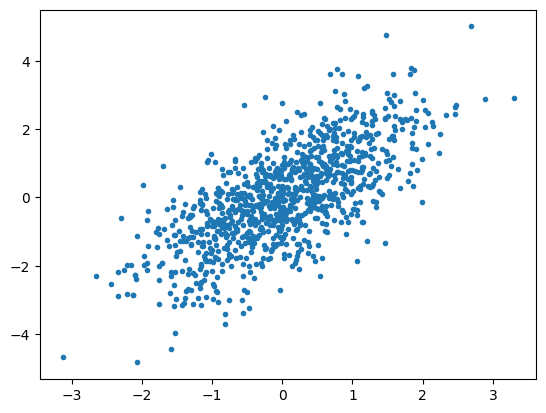

In [17]:
N = 1000
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'.')
plt.show()

In [18]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1),  # input layer
    nn.ReLU(),  # activation function
    nn.Linear(1, 1),  # output layer
)

In [19]:
# model meta-parameters

learningRate = 0.05

# loss function
lossfun = nn.MSELoss()  # mean squared error

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Show shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train[:5])

torch.Size([800, 1])

torch.Size([200, 1])

torch.Size([800, 1])

torch.Size([200, 1])

tensor([[ 0.0964],
        [ 1.9922],
        [-0.7216],
        [-0.0048],
        [-0.7388]])

In [21]:
# Create datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

numepochs = 400
train_loss = []
test_loss = []

for epochi in range(numepochs):
    # forward pass
    yHat = ANNreg(x_train)

    # compute loss of the TRAIN set
    loss = lossfun(yHat, y_train)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute losses of the TEST set
    predYtest = ANNreg(x_test)
    testloss = (predYtest - y_test).pow(2).mean()

    # save losses
    train_loss.append(loss.detach())
    test_loss.append(testloss.detach())


# compute losses of the TEST set
predYtest = ANNreg(x_test)
testloss = lossfun(predYtest, y_test)

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.02

Final TEST loss: 1.08

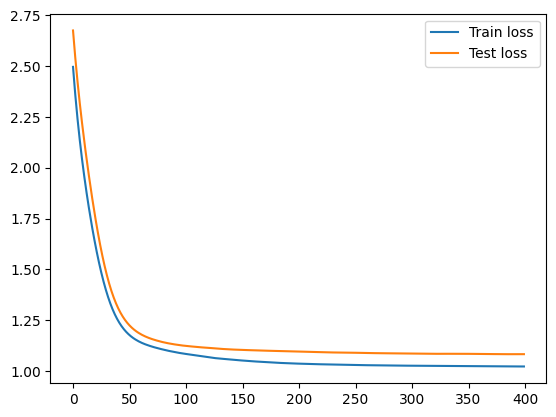

In [22]:
# plot the saved losses
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend()
plt.show()


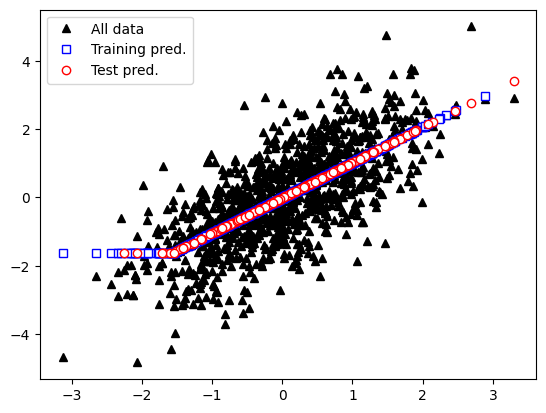

In [23]:
# Plot the data
predYtrain = ANNreg(x_train).detach().numpy()

# now plot
plt.plot(x, y, 'k^', label='All data')
plt.plot(x_train, predYtrain,
         'bs', markerfacecolor='w', label='Training pred.')
plt.plot(x_test, predYtest.detach(),
            'ro', markerfacecolor='w', label='Test pred.')
plt.legend()
plt.show()